本系列的第八篇笔记进入可视化的内容。可视化也是数据分析重要的阶段，这是成果的输出部分，毕竟“千言万语不如一张图”，对于数据分析师来说，“好的可视化是会讲故事的”，还有就是探索性数据分析也会用到数据可视化。书中**第6章 图与图表**部分会有两篇笔记，这一篇是关于matplotlib库的，我会实践条形图、折线图、散点图、箱线图等。




### 目录
- matplotlib入门框架
- 条形图
- 直方图
- 折线图
- 散点图
- 箱线图


Python 提供了若干种用于绘图的扩展包，包括 matplotlib、pandas、ggplot 和 seaborn。因为 matplotlib 是最基础的扩展包，它为 pandas 和 seaborn 提供了一些基础的绘图概念和语法，所以这里先介绍 matplotlib。然后，我们通过一些示例，看看其他扩展包如何提供更简洁的绘图语法，或者提供一些额外的功能。

## matplotlib入门框架

一个简单的用matplotlib画图的框架如下，在jupyter中可以加入 %matplotlib inline 这一句，如果是写成.py的脚本，就移除这一句，在画图后写plt.show()，通过plt.savefig()可以保存图片到本地。


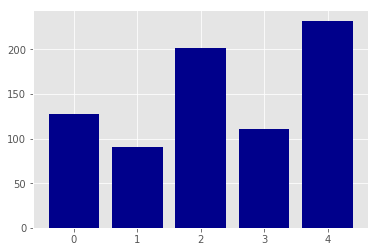

In [1]:
def matplotlibFrame():
    import matplotlib.pyplot as plt #引入pyplot库
    %matplotlib inline  
    #%matplotlib inline是jupyter自带的方式，允许图表在cell中输出，不需要再写plt.show()
    plt.style.use('ggplot') #使用R语言中的ggplot2配色作为绘图风格，纯粹为了好看。
    
    sale_amounts = [127, 90, 201, 111, 232]
    fig = plt.figure()  #创建一个基础图，然后在基础图中创建一个或多个子图
    ax1 = fig.add_subplot(1,1,1)
    ax1.bar(range(len(sale_amounts)), sale_amounts, align='center', color='darkblue')
    #plt.savefig('bar_plot.png', dpi=400, bbox_inches='tight') 
    #通过plt.savefig()可以保存图片到本地

matplotlibFrame()

需要注意的是 pyplot并不默认支持中文显示，需要rcParams修改字体实现，或者在有中文输出的地方，增加一个属性：
fontproperties eg：plt.ylebel(“时间(s)”,fontproperties=”SimHei”,fontsize=20)

matplotlib的pyplot子库提供了很多类型的基础图形：

- plt.boxplot (data,notch,position)  #绘制箱形图#
- plt.bar(left,height,width,bottom)   #绘制条形图#
- plt.barh(width,bottom,left,height)   #绘制横向条形图#
- plt.polar(theta, r)  #绘制极坐标图#
- plt.pie(data, explode)  #绘制饼图#
- plt.hist()  #绘制直方图#

## 条形图 
下面我们增加一些代码画元素更丰富的条形图。

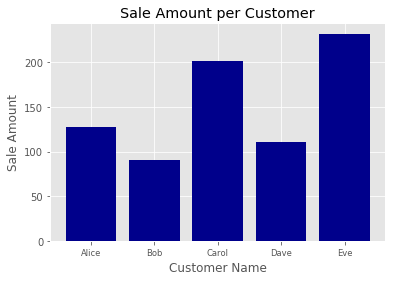

In [2]:
#条形图
def basicBarPlot():
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    customers = ['Alice', 'Bob', 'Carol', 'Dave', 'Eve'] #横轴标签，某类树洞的梗
    customers_index = range(len(customers))
    sale_amounts = [127, 90, 201, 111, 232] #条形图的高度，数据高度

    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.bar(customers_index, sale_amounts, align='center', color='darkblue') #align设置条形与标签中间对齐。color设置条形的颜色。
    ax1.xaxis.set_ticks_position('bottom') #设置刻度线位置在 x 轴底部和 y 轴左侧
    ax1.yaxis.set_ticks_position('left')
    plt.xticks(customers_index, customers, rotation=0, fontsize='small')
    #fontsize='small' 将刻度标签的字体设为小字体。
    plt.xlabel('Customer Name')
    plt.ylabel('Sale Amount')
    plt.title('Sale Amount per Customer')

    #plt.savefig('bar_plot.png', dpi=400, bbox_inches='tight')
    plt.show() #display
basicBarPlot()

## 直方图
常用的直方图包括频率分布、频率密度分布、概率分布和概率密度分布。

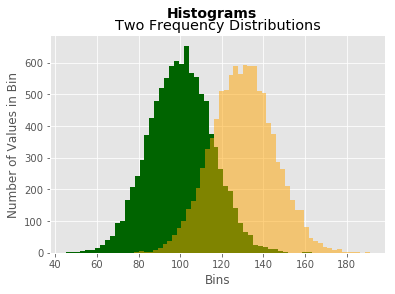

In [8]:
#频率直方图
def histogram():
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    mu1, mu2, sigma = 100, 130, 15
    x1 = mu1 + sigma*np.random.randn(10000)
    x2 = mu2 + sigma*np.random.randn(10000)

    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    n, bins, patches = ax1.hist(x1, bins=50, normed=False, color='darkgreen')
    n, bins, patches = ax1.hist(x2, bins=50, normed=False, color='orange', alpha=0.5)
    #上面分别画两个直方图
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    plt.xlabel('Bins')
    plt.ylabel('Number of Values in Bin')
    fig.suptitle('Histograms', fontsize=14, fontweight='bold') #为基础图添加一个居中的标题
    ax1.set_title('Two Frequency Distributions')

    #plt.savefig('histogram.png', dpi=400, bbox_inches='tight')
    plt.show()
    
histogram()

## 折线图
折线图中的数值点在一条折线上。它通常用来表示数据随着时间发生的变化。

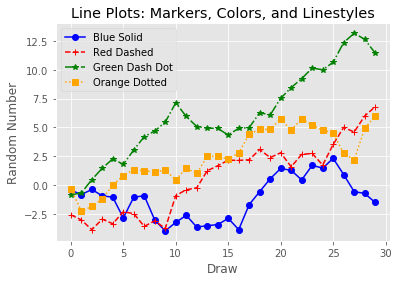

In [4]:
#折线图
def linePlot():
    from numpy.random import randn
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    plot_data1 = randn(30).cumsum() #生成随机数据
    plot_data2 = randn(30).cumsum()
    plot_data3 = randn(30).cumsum()
    plot_data4 = randn(30).cumsum()

    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(plot_data1, marker=r'o', color=u'blue', linestyle='-', label='Blue Solid')
    ax1.plot(plot_data2, marker=r'+', color=u'red', linestyle='--', label='Red Dashed')
    ax1.plot(plot_data3, marker=r'*', color=u'green', linestyle='-.', label='Green Dash Dot')
    ax1.plot(plot_data4, marker=r's', color=u'orange', linestyle=':', label='Orange Dotted')
    #分别建立4条不同的折线到同一个图中
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.set_title('Line Plots: Markers, Colors, and Linestyles')
    plt.xlabel('Draw')
    plt.ylabel('Random Number')
    plt.legend(loc='best')
    plt.show()
    
linePlot()

## 散点图
散点图非常适合展示两个数值变量之间的关系，因为可以直接看到数据的原始分布，当然主要是针对二维数据，如果是高维数据，需要降维。这两个变量分别位于两个数轴上。散点图有助于识别出变量之间是否具有正相关（图中的点集中于某个具体参数）或负相关（图中的点像云一样发散）。 numpy 的 polyfit 函数可以对二维数组进行拟合。

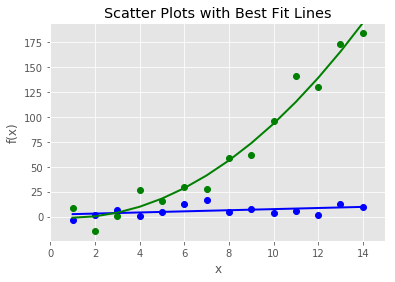

In [5]:
#散点图
def scatterPlot():
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    x = np.arange(start=1., stop=15., step=1.)
    y_linear = x + 5. * np.random.randn(14)  #同样用到随机数据
    y_quadratic = x**2 + 10. * np.random.randn(14)

    fn_linear = np.poly1d(np.polyfit(x, y_linear, deg=1))  #拟合
    fn_quadratic = np.poly1d(np.polyfit(x, y_quadratic, deg=2))

    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(x, y_linear, 'bo', x, y_quadratic, 'go',x, fn_linear(x), 'b-', x, fn_quadratic(x), 'g-', linewidth=2.)
    #'bo' 表示 (x, y_linear）点是蓝色圆圈，'go' 表示 (x, y_quadratic) 点是绿色圆圈。同样，'b-' 表示 (x, y_linear) 点之间的线是
    #一条蓝色实线，'g-' 表示 (x, y_quadratic) 点之间的线是一条绿色实线。通过 linewidth可设置线的宽度。
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.set_title('Scatter Plots with Best Fit Lines')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xlim((min(x)-1., max(x)+1.))
    plt.ylim((min(y_quadratic)-10., max(y_quadratic)+10.))

    plt.savefig('scatter_plot.png', dpi=400, bbox_inches='tight')
    plt.show()
    
scatterPlot()

## 箱线图
箱线图在探索性数据分析中经常用到，能表达的信息很多。箱线图可以表示出数据的最小值、第一四分位数、中位数、第三四分位数和最大值。箱体的下部和上部边缘线分别表示第一四分位数和第三四分位数，箱体中间的直线表示中位数。箱体上下两端延伸出去的直线（whisker，亦称为“须” ）表示非离群点的最小值和最大值，在直线（须）之外的点表示离群点。

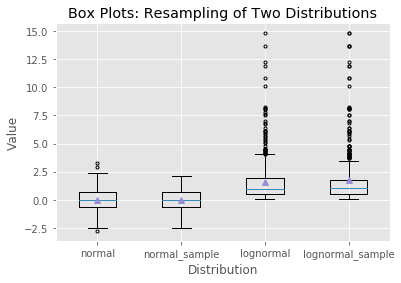

In [6]:
#箱线图
def basicBoxPlot():
    import numpy as np
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    N = 500
    normal = np.random.normal(loc=0.0, scale=1.0, size=N)
    lognormal = np.random.lognormal(mean=0.0, sigma=1.0, size=N)
    index_value = np.random.randint(low=0, high=N-1, size=N)
    normal_sample = normal[index_value]
    lognormal_sample = lognormal[index_value]
    box_plot_data = [normal,normal_sample,lognormal,lognormal_sample]

    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)

    box_labels = ['normal','normal_sample','lognormal','lognormal_sample']
    ax1.boxplot(box_plot_data, notch=False, sym='.', vert=True, whis=1.5,showmeans=True, labels=box_labels)
    #画箱线图
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.set_title('Box Plots: Resampling of Two Distributions')
    ax1.set_xlabel('Distribution')
    ax1.set_ylabel('Value')

    #plt.savefig('box_plot.png', dpi=400, bbox_inches='tight')
    plt.show()
basicBoxPlot()

这篇笔记因为有比较多的图表，我感觉挺赏心悦目的，matplotlib绘图也不是很难，效果和可定制性都很好，matplotlib库还有很多强大和细致的功能，需要深入学习可以参考[官方文档](http://matplotlib.org/ )。Python里面还有其他很有特色的可视化库，例如ggplot、plotnine和seaborn，下一篇笔记会介绍这些可视化库。

ps：书中没有讲到地理数据可视化，地理数据可视化也是非常有用和美妙的。